**<h2> MADS: Milestone II (Team 10) - Feature Importance and Feature Ablation</h2>**
<h3> Topic: Machine learning on duty: solving consumer complaints and improving satisfaction!</h3>
<h4> Authors: Chih-Han Yeh (yehch), Yi-Hsin Chien (yihsinc), Weiming Chen ( weimingc) </h4>
<h4> Mentor: Alexis Castellanos</h4>

#Environment Setting
Importing libraries we need for our project.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install keras
!pip install catboost
!pip install scikeras[tensorflow]
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Atte

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
# Built-in libraries
import re
import string
import warnings

# Third-party libraries for data handling and processing
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from tqdm import tqdm

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import KeyedVectors

# Pre-processing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, MaxAbsScaler
from imblearn.over_sampling import SMOTE

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, LSTM
from keras.callbacks import EarlyStopping

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


# Miscellaneous
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tqdm.pandas()
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Loading preprocessed dataset for saving computing power


In [ ]:

X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')

In [ ]:
y = pd.read_hdf('/content/drive/MyDrive/milestone II/y_smote.h5', 'y')

In [ ]:
lst = X.columns.tolist()
Product = [i for i in lst if 'Product_' in i]
Subproduct = [i for i in lst if "Sub-product_" in i]
Issue = [ i for i in lst if "Issue_" in i]
Subissue = [i for i in lst if "Sub-issue_"in i]
Comp_pub = [i for i in lst if "Company public response_" in i]
Comp = [i for i in lst if "Company_" in i]
State = [i for i in lst if "State_" in i]
Tags = [i for i in lst if "Tags_" in i]
Resp_consumer = [i for i in lst if "Company response to consumer_" in i ]
Narr = lst[:4999]
days_betweem = lst[5000]
word_count = lst[5001]
Dis_count_90 = lst[5002]
Compt_90 = lst[5003]
Dis_ratio = lst[5004]

### CatBoost Model

In [ ]:
def cross_val_catboost(X_a, y_a, k):

    # instantiate catboost model
    classifier = CatBoostClassifier(random_state=42)

    # Perform 5-fold cross-validation and get scores
    scores = cross_val_score(classifier, X_a, y_a, cv=k, scoring = "f1_macro")

    # print f1 score
    # print(f"Mean score of cross validation: {scores.mean()}")

    return scores

### Feature Ablation: checking F1-score

Full features

In [ ]:
ful_sc = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.4726581	total: 4.86s	remaining: 16m 7s
5:	learn: 0.4607072	total: 5.96s	remaining: 16m 28s
6:	learn: 0.4377994	total: 6.83s	remaining: 16m 9s
7:	learn: 0.4171681	total: 7.69s	remaining: 15m 53s
8:	learn: 0.4010359	total: 8.59s	remaining: 15m 46s
9:	learn: 0.3927636	total: 9.61s	remaining: 15m 50s
10:	learn: 0.3779392	total: 10.5s	remaining: 15m 47s
11:	learn: 0.3673447	total: 11.5s	remaining: 15m 44s
12:	learn: 0.3519227	total: 12.5s	remaining: 15m 45s
13:	learn: 0.3411759	total: 13.4s	remaining: 15m 42s
14:	learn: 0.3316718	total: 14.3s	remaining: 15m 39s
15:	learn: 0.3171439	total: 15.4s	remaining: 15m 45s
16:	learn: 0.3063285	total: 16.2s	remaining: 15m 34s
17:	learn: 0.3014356	total: 17s	remaining: 15m 28s
18:	learn: 0.2934453	total: 17.9s	remaining: 15m 23s
19:	learn: 0.2848154	total: 18.7s	remaining: 15m 17s
20:	learn: 0.2778008	total: 19.6s	remaining: 15m 12s
21:	learn: 0.2702449	total: 20.3s	remaining: 15m 4s
22:	learn: 0.2656703	total: 21.2s	re

In [ ]:
ful_sc

array([0.41670184, 0.8119742 , 0.97071621, 0.97493592, 0.97104777])

array([0.41670184, 0.8119742 , 0.97071621, 0.97493592, 0.97104777])



*   Ablated Product:



In [ ]:
X = X[X.columns[~X.columns.isin(Product)]]

In [ ]:
nProduct = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.4977888	total: 5.02s	remaining: 16m 39s
5:	learn: 0.4642845	total: 5.91s	remaining: 16m 19s
6:	learn: 0.4533667	total: 7s	remaining: 16m 33s
7:	learn: 0.4432402	total: 7.99s	remaining: 16m 30s
8:	learn: 0.4097341	total: 9.03s	remaining: 16m 34s
9:	learn: 0.3866286	total: 9.89s	remaining: 16m 19s
10:	learn: 0.3719584	total: 10.8s	remaining: 16m 14s
11:	learn: 0.3528892	total: 11.7s	remaining: 16m 1s
12:	learn: 0.3381248	total: 12.5s	remaining: 15m 50s
13:	learn: 0.3271211	total: 13.4s	remaining: 15m 46s
14:	learn: 0.3141633	total: 14.2s	remaining: 15m 35s
15:	learn: 0.3059965	total: 15.1s	remaining: 15m 28s
16:	learn: 0.2961946	total: 15.9s	remaining: 15m 17s
17:	learn: 0.2911998	total: 16.7s	remaining: 15m 9s
18:	learn: 0.2789172	total: 17.5s	remaining: 15m 5s
19:	learn: 0.2698703	total: 18.4s	remaining: 14m 59s
20:	learn: 0.2643008	total: 19.2s	remaining: 14m 53s
21:	learn: 0.2577900	total: 20s	remaining: 14m 49s
22:	learn: 0.2524110	total: 20.7s	remai

In [ ]:
nProduct

array([0.41588054, 0.81222282, 0.96870457, 0.97550143, 0.97139934])

{"Full":[0.41670184, 0.8119742 , 0.97071621, 0.97493592, 0.97104777],
"nProduct": [0.41588054, 0.81222282, 0.96870457, 0.97550143, 0.97139934]}



*   Ablated Sub-product:



In [ ]:
X = X[X.columns[~X.columns.isin(Subproduct)]]

In [ ]:
nSubproduct = cross_val_catboost(X, y, 5)

In [ ]:
nSubproduct

array([0.41720641, 0.81220498, 0.96946661, 0.97569711, 0.97056   ])

{"Full":[0.41670184, 0.8119742 , 0.97071621, 0.97493592, 0.97104777],
"nProduct": [0.41588054, 0.81222282, 0.96870457, 0.97550143, 0.97139934],
"nSubproduct": [0.41720641, 0.81220498, 0.96946661, 0.97569711, 0.97056],
"nIssue": [0.41594024, 0.81130824, 0.9697792 , 0.97538436, 0.97114569]}



*   Ablated Issue



In [ ]:
X = X[X.columns[~X.columns.isin(Issue)]]

In [ ]:
nIssue = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.4770602	total: 4.77s	remaining: 15m 50s
5:	learn: 0.4530968	total: 5.64s	remaining: 15m 34s
6:	learn: 0.4422507	total: 6.64s	remaining: 15m 42s
7:	learn: 0.4226626	total: 7.48s	remaining: 15m 27s
8:	learn: 0.4031603	total: 8.31s	remaining: 15m 15s
9:	learn: 0.3813384	total: 9.32s	remaining: 15m 22s
10:	learn: 0.3686566	total: 10.3s	remaining: 15m 24s
11:	learn: 0.3621592	total: 11.3s	remaining: 15m 31s
12:	learn: 0.3432266	total: 12.3s	remaining: 15m 30s
13:	learn: 0.3282555	total: 13.2s	remaining: 15m 26s
14:	learn: 0.3157184	total: 14s	remaining: 15m 20s
15:	learn: 0.3098707	total: 14.8s	remaining: 15m 10s
16:	learn: 0.3008324	total: 15.6s	remaining: 15m
17:	learn: 0.2947302	total: 16.4s	remaining: 14m 55s
18:	learn: 0.2876799	total: 17.3s	remaining: 14m 54s
19:	learn: 0.2808607	total: 18.1s	remaining: 14m 48s
20:	learn: 0.2734080	total: 18.9s	remaining: 14m 39s
21:	learn: 0.2664125	total: 19.6s	remaining: 14m 29s
22:	learn: 0.2579327	total: 20.3s	rem

In [ ]:
nIssue

array([0.41594024, 0.81130824, 0.9697792 , 0.97538436, 0.97114569])



*   Ablated Subissue



In [ ]:
X = X[X.columns[~X.columns.isin(Subissue)]]

In [ ]:
cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.5023007	total: 4.8s	remaining: 15m 54s
5:	learn: 0.4869600	total: 5.75s	remaining: 15m 52s
6:	learn: 0.4571914	total: 6.64s	remaining: 15m 42s
7:	learn: 0.4255974	total: 7.55s	remaining: 15m 35s
8:	learn: 0.4077639	total: 8.4s	remaining: 15m 24s
9:	learn: 0.3993728	total: 9.35s	remaining: 15m 25s
10:	learn: 0.3868459	total: 10.2s	remaining: 15m 14s
11:	learn: 0.3707484	total: 11.2s	remaining: 15m 24s
12:	learn: 0.3545182	total: 12.1s	remaining: 15m 18s
13:	learn: 0.3424275	total: 13.1s	remaining: 15m 24s
14:	learn: 0.3316064	total: 14.2s	remaining: 15m 31s
15:	learn: 0.3215257	total: 15.1s	remaining: 15m 25s
16:	learn: 0.3129374	total: 15.8s	remaining: 15m 15s
17:	learn: 0.3059539	total: 16.6s	remaining: 15m 6s
18:	learn: 0.2982301	total: 17.4s	remaining: 14m 58s
19:	learn: 0.2915558	total: 18.2s	remaining: 14m 51s
20:	learn: 0.2811185	total: 19s	remaining: 14m 43s
21:	learn: 0.2668120	total: 20s	remaining: 14m 47s
22:	learn: 0.2622127	total: 20.8s	rema

array([0.41547779, 0.81146494, 0.96991635, 0.97501435, 0.97028657])



*   Ablated Company Public Response



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X = X[X.columns[~X.columns.isin(Comp_pub)]]

In [ ]:
cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.4987825	total: 4.95s	remaining: 16m 25s
5:	learn: 0.4756343	total: 5.9s	remaining: 16m 17s
6:	learn: 0.4438955	total: 6.9s	remaining: 16m 18s
7:	learn: 0.4305038	total: 7.99s	remaining: 16m 30s
8:	learn: 0.4121240	total: 8.99s	remaining: 16m 29s
9:	learn: 0.4038910	total: 9.99s	remaining: 16m 29s
10:	learn: 0.3861333	total: 10.9s	remaining: 16m 18s
11:	learn: 0.3691650	total: 11.7s	remaining: 16m 6s
12:	learn: 0.3535843	total: 12.5s	remaining: 15m 51s
13:	learn: 0.3411535	total: 13.4s	remaining: 15m 44s
14:	learn: 0.3294959	total: 14.3s	remaining: 15m 40s
15:	learn: 0.3202651	total: 15.1s	remaining: 15m 29s
16:	learn: 0.3081524	total: 15.9s	remaining: 15m 21s
17:	learn: 0.3013405	total: 16.8s	remaining: 15m 16s
18:	learn: 0.2923587	total: 17.6s	remaining: 15m 7s
19:	learn: 0.2849346	total: 18.4s	remaining: 15m 1s
20:	learn: 0.2793620	total: 19.2s	remaining: 14m 56s
21:	learn: 0.2735011	total: 20s	remaining: 14m 50s
22:	learn: 0.2689253	total: 20.9s	rema

array([0.4164356 , 0.81254907, 0.96919447, 0.97552147, 0.97075469])



*   Ablated Company



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X = X[X.columns[~X.columns.isin(Comp)]]

In [ ]:
cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.4820094	total: 5.02s	remaining: 16m 39s
5:	learn: 0.4506391	total: 5.94s	remaining: 16m 24s
6:	learn: 0.4300682	total: 6.84s	remaining: 16m 10s
7:	learn: 0.4148759	total: 7.74s	remaining: 16m
8:	learn: 0.3982165	total: 8.6s	remaining: 15m 47s
9:	learn: 0.3860172	total: 9.47s	remaining: 15m 37s
10:	learn: 0.3732753	total: 10.3s	remaining: 15m 23s
11:	learn: 0.3622468	total: 11.2s	remaining: 15m 22s
12:	learn: 0.3435236	total: 12.3s	remaining: 15m 35s
13:	learn: 0.3267744	total: 13.1s	remaining: 15m 23s
14:	learn: 0.3179080	total: 14.1s	remaining: 15m 23s
15:	learn: 0.3037626	total: 15.1s	remaining: 15m 29s
16:	learn: 0.2961357	total: 16s	remaining: 15m 24s
17:	learn: 0.2884957	total: 16.9s	remaining: 15m 19s
18:	learn: 0.2840332	total: 17.8s	remaining: 15m 20s
19:	learn: 0.2768910	total: 18.6s	remaining: 15m 12s
20:	learn: 0.2669645	total: 19.5s	remaining: 15m 11s
21:	learn: 0.2634803	total: 20.3s	remaining: 15m
22:	learn: 0.2586378	total: 21.1s	remainin

array([0.41539226, 0.8119844 , 0.97075529, 0.9756385 , 0.97161441])



*   Ablated State



In [ ]:
X = X[X.columns[~X.columns.isin(State)]]

In [ ]:
nState = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.5024037	total: 6.05s	remaining: 20m 4s
5:	learn: 0.4892608	total: 7.14s	remaining: 19m 43s
6:	learn: 0.4641518	total: 8.26s	remaining: 19m 31s
7:	learn: 0.4471690	total: 9.32s	remaining: 19m 15s
8:	learn: 0.4245655	total: 10.4s	remaining: 19m 8s
9:	learn: 0.4159566	total: 11.5s	remaining: 19m 1s
10:	learn: 0.3911133	total: 12.4s	remaining: 18m 38s
11:	learn: 0.3777606	total: 13.4s	remaining: 18m 22s
12:	learn: 0.3722237	total: 14.3s	remaining: 18m 7s
13:	learn: 0.3626632	total: 15.2s	remaining: 17m 52s
14:	learn: 0.3518062	total: 16.2s	remaining: 17m 43s
15:	learn: 0.3352522	total: 17.2s	remaining: 17m 35s
16:	learn: 0.3298631	total: 18s	remaining: 17m 23s
17:	learn: 0.3197028	total: 19.1s	remaining: 17m 19s
18:	learn: 0.3152154	total: 19.9s	remaining: 17m 8s
19:	learn: 0.3101809	total: 20.7s	remaining: 16m 55s
20:	learn: 0.3067177	total: 21.7s	remaining: 16m 50s
21:	learn: 0.3036633	total: 22.7s	remaining: 16m 48s
22:	learn: 0.2989724	total: 23.8s	rema

In [ ]:
nState

array([0.41757453, 0.81225552, 0.96562016, 0.97200937, 0.96790434])



*   Ablated Tags



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X = X[X.columns[~X.columns.isin(Tags)]]

In [ ]:
nTags = cross_val_catboost(X, y, 5)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4988759	total: 5.18s	remaining: 17m 11s
5:	learn: 0.4753670	total: 6.15s	remaining: 16m 58s
6:	learn: 0.4635989	total: 7.12s	remaining: 16m 49s
7:	learn: 0.4380853	total: 8.02s	remaining: 16m 34s
8:	learn: 0.4197395	total: 9.13s	remaining: 16m 45s
9:	learn: 0.3973267	total: 10s	remaining: 16m 33s
10:	learn: 0.3861814	total: 11s	remaining: 16m 26s
11:	learn: 0.3673456	total: 12s	remaining: 16m 28s
12:	learn: 0.3521972	total: 12.9s	remaining: 16m 21s
13:	learn: 0.3345810	total: 14s	remaining: 16m 28s
14:	learn: 0.3183997	total: 14.9s	remaining: 16m 21s
15:	learn: 0.3122670	total: 15.8s	remaining: 16m 14s
16:	learn: 0.3031583	total: 16.7s	remaining: 16m 6s
17:	learn: 0.2964776	total: 17.6s	remaining: 16m 2s
18:	learn: 0.2908332	total: 18.5s	remaining: 15m 56s
19:	learn: 0.2830380	total: 19.5s	remaining: 15m 55s
20:	learn: 0.2745598	total: 20.4s	remaining: 15m 49s
21:	learn: 0.2697268	total: 21.2s	remaining: 15m 44s
22:	learn: 

In [ ]:
nTags

array([0.41547955, 0.81208992, 0.9690359 , 0.97581391, 0.9712235 ])



*   Ablated Company Response to Consumer



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X = X[X.columns[~X.columns.isin(Resp_consumer)]]

In [ ]:
nResp_consumer = cross_val_catboost(X, y, 5)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5110069	total: 5.25s	remaining: 17m 24s
5:	learn: 0.4778234	total: 6.2s	remaining: 17m 7s
6:	learn: 0.4621328	total: 7.37s	remaining: 17m 25s
7:	learn: 0.4433405	total: 8.37s	remaining: 17m 18s
8:	learn: 0.4209730	total: 9.28s	remaining: 17m 1s
9:	learn: 0.3972135	total: 10.3s	remaining: 17m
10:	learn: 0.3827262	total: 11.1s	remaining: 16m 41s
11:	learn: 0.3624282	total: 12s	remaining: 16m 31s
12:	learn: 0.3447598	total: 12.9s	remaining: 16m 17s
13:	learn: 0.3359624	total: 13.8s	remaining: 16m 9s
14:	learn: 0.3264830	total: 14.7s	remaining: 16m 5s
15:	learn: 0.3161231	total: 15.5s	remaining: 15m 52s
16:	learn: 0.3068520	total: 16.3s	remaining: 15m 43s
17:	learn: 0.2951029	total: 17.3s	remaining: 15m 42s
18:	learn: 0.2911480	total: 18.3s	remaining: 15m 42s
19:	learn: 0.2814175	total: 19.1s	remaining: 15m 36s
20:	learn: 0.2733467	total: 20.1s	remaining: 15m 37s
21:	learn: 0.2690224	total: 21s	remaining: 15m 34s
22:	learn: 0.2

In [ ]:
nResp_consumer

array([0.41416243, 0.81158517, 0.97286659, 0.97860579, 0.97315751])



*   Ablated Narratives


In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X = X[X.columns[~X.columns.isin(Narr)]]

In [ ]:
nNarr = cross_val_catboost(X, y, 5)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4465402	total: 422ms	remaining: 1m 23s
5:	learn: 0.4181245	total: 501ms	remaining: 1m 23s
6:	learn: 0.3878144	total: 591ms	remaining: 1m 23s
7:	learn: 0.3726159	total: 674ms	remaining: 1m 23s
8:	learn: 0.3595852	total: 750ms	remaining: 1m 22s
9:	learn: 0.3400690	total: 830ms	remaining: 1m 22s
10:	learn: 0.3234009	total: 916ms	remaining: 1m 22s
11:	learn: 0.3143370	total: 995ms	remaining: 1m 21s
12:	learn: 0.3019344	total: 1.08s	remaining: 1m 21s
13:	learn: 0.2938490	total: 1.15s	remaining: 1m 21s
14:	learn: 0.2849413	total: 1.23s	remaining: 1m 20s
15:	learn: 0.2757136	total: 1.3s	remaining: 1m 20s
16:	learn: 0.2694047	total: 1.38s	remaining: 1m 19s
17:	learn: 0.2613869	total: 1.46s	remaining: 1m 19s
18:	learn: 0.2540605	total: 1.54s	remaining: 1m 19s
19:	learn: 0.2490934	total: 1.61s	remaining: 1m 19s
20:	learn: 0.2438189	total: 1.68s	remaining: 1m 18s
21:	learn: 0.2389583	total: 1.76s	remaining: 1m 18s
22:	learn: 0.2366368

In [ ]:
nNarr

array([0.4095027 , 0.80688579, 0.9772998 , 0.98307466, 0.97655813])



*  Ablated Days_between


In [ ]:
X.drop(columns= days_betweem, inplace=True)

In [ ]:
ndays_betweem = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.4766680	total: 4.81s	remaining: 15m 57s
5:	learn: 0.4630090	total: 5.87s	remaining: 16m 12s
6:	learn: 0.4521716	total: 6.99s	remaining: 16m 32s
7:	learn: 0.4127158	total: 8.18s	remaining: 16m 54s
8:	learn: 0.4038146	total: 9.31s	remaining: 17m 5s
9:	learn: 0.3823699	total: 10.2s	remaining: 16m 46s
10:	learn: 0.3681426	total: 11.1s	remaining: 16m 39s
11:	learn: 0.3529478	total: 12s	remaining: 16m 27s
12:	learn: 0.3386754	total: 13s	remaining: 16m 28s
13:	learn: 0.3323931	total: 14s	remaining: 16m 24s
14:	learn: 0.3232034	total: 14.9s	remaining: 16m 17s
15:	learn: 0.3087426	total: 15.8s	remaining: 16m 13s
16:	learn: 0.3034333	total: 16.8s	remaining: 16m 13s
17:	learn: 0.2962819	total: 17.7s	remaining: 16m 6s
18:	learn: 0.2890949	total: 18.5s	remaining: 15m 57s
19:	learn: 0.2804464	total: 19.4s	remaining: 15m 48s
20:	learn: 0.2718448	total: 20.1s	remaining: 15m 38s
21:	learn: 0.2626947	total: 20.9s	remaining: 15m 30s
22:	learn: 0.2545741	total: 21.9s	remai

In [ ]:
ndays_betweem

array([0.4151225 , 0.81170445, 0.97018936, 0.97587305, 0.97056   ])



*   Ablated Word_count



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X.drop(columns= word_count, inplace=True)

In [ ]:
nword_count = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.5014397	total: 4.85s	remaining: 16m 6s
5:	learn: 0.4784322	total: 5.77s	remaining: 15m 55s
6:	learn: 0.4495626	total: 6.83s	remaining: 16m 8s
7:	learn: 0.4238391	total: 7.72s	remaining: 15m 57s
8:	learn: 0.4153032	total: 8.78s	remaining: 16m 6s
9:	learn: 0.3960343	total: 9.77s	remaining: 16m 7s
10:	learn: 0.3847172	total: 10.7s	remaining: 16m 3s
11:	learn: 0.3669117	total: 11.9s	remaining: 16m 16s
12:	learn: 0.3523366	total: 12.8s	remaining: 16m 11s
13:	learn: 0.3343801	total: 13.8s	remaining: 16m 8s
14:	learn: 0.3261992	total: 14.6s	remaining: 15m 59s
15:	learn: 0.3168264	total: 15.6s	remaining: 15m 58s
16:	learn: 0.3019503	total: 16.5s	remaining: 15m 52s
17:	learn: 0.2958234	total: 17.4s	remaining: 15m 49s
18:	learn: 0.2883933	total: 18.2s	remaining: 15m 40s
19:	learn: 0.2840139	total: 19s	remaining: 15m 32s
20:	learn: 0.2777204	total: 19.9s	remaining: 15m 26s
21:	learn: 0.2685153	total: 20.6s	remaining: 15m 16s
22:	learn: 0.2654221	total: 21.4s	remai

In [ ]:
nword_count

array([0.41997525, 0.81407449, 0.97036575, 0.97526785, 0.97108825])



*   Ablated Disputed Count in 90 days



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X.drop(columns= Dis_count_90, inplace=True)

In [ ]:
nDis_count_90 = cross_val_catboost(X, y, 5)

串流輸出內容已截斷至最後 5000 行。
4:	learn: 0.5020749	total: 5.29s	remaining: 17m 32s
5:	learn: 0.4691079	total: 6.14s	remaining: 16m 57s
6:	learn: 0.4475895	total: 7.03s	remaining: 16m 37s
7:	learn: 0.4223262	total: 7.95s	remaining: 16m 25s
8:	learn: 0.4105600	total: 8.96s	remaining: 16m 26s
9:	learn: 0.3951274	total: 9.89s	remaining: 16m 19s
10:	learn: 0.3733490	total: 11s	remaining: 16m 25s
11:	learn: 0.3580264	total: 11.9s	remaining: 16m 19s
12:	learn: 0.3440835	total: 12.8s	remaining: 16m 13s
13:	learn: 0.3339898	total: 13.8s	remaining: 16m 14s
14:	learn: 0.3258163	total: 14.8s	remaining: 16m 10s
15:	learn: 0.3152865	total: 15.6s	remaining: 16m 2s
16:	learn: 0.3007237	total: 16.7s	remaining: 16m 3s
17:	learn: 0.2948934	total: 17.5s	remaining: 15m 55s
18:	learn: 0.2858680	total: 18.4s	remaining: 15m 49s
19:	learn: 0.2782539	total: 19.4s	remaining: 15m 52s
20:	learn: 0.2726836	total: 20.3s	remaining: 15m 48s
21:	learn: 0.2658150	total: 21.2s	remaining: 15m 43s
22:	learn: 0.2629025	total: 22.2s	r

In [ ]:
nDis_count_90

array([0.4148419 , 0.81234419, 0.96977877, 0.97608694, 0.97124292])



*   Ablated Complaint in 90 days



In [ ]:
del X
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X_smote.h5', 'X')
X.drop(columns= Compt_90, inplace=True)

In [ ]:
nCompt_90 = cross_val_catboost(X, y, 5)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5017707	total: 5.38s	remaining: 17m 51s
5:	learn: 0.4685083	total: 6.28s	remaining: 17m 21s
6:	learn: 0.4414642	total: 7.27s	remaining: 17m 11s
7:	learn: 0.4225894	total: 8.11s	remaining: 16m 45s
8:	learn: 0.3994262	total: 9.1s	remaining: 16m 41s
9:	learn: 0.3912263	total: 10s	remaining: 16m 33s
10:	learn: 0.3748821	total: 10.9s	remaining: 16m 23s
11:	learn: 0.3597430	total: 11.8s	remaining: 16m 14s
12:	learn: 0.3354510	total: 12.8s	remaining: 16m 10s
13:	learn: 0.3214515	total: 13.6s	remaining: 15m 57s
14:	learn: 0.3119888	total: 14.5s	remaining: 15m 54s
15:	learn: 0.3020619	total: 15.4s	remaining: 15m 47s
16:	learn: 0.2953670	total: 16.4s	remaining: 15m 48s
17:	learn: 0.2876323	total: 17.4s	remaining: 15m 50s
18:	learn: 0.2808139	total: 18.3s	remaining: 15m 46s
19:	learn: 0.2734635	total: 19.2s	remaining: 15m 41s
20:	learn: 0.2655865	total: 20.1s	remaining: 15m 36s
21:	learn: 0.2581218	total: 20.9s	remaining: 15m 31s
22:	

In [ ]:
nCompt_90

array([0.41535001, 0.81148463, 0.97022832, 0.97612633, 0.971634  ])



*   Ablated Disputed Ratio



In [ ]:
X.drop(columns= Dis_ratio, inplace=True)

In [ ]:
cross_val_catboost(X, y, 5)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4652464	total: 4.96s	remaining: 16m 26s
5:	learn: 0.4358752	total: 6s	remaining: 16m 33s
6:	learn: 0.4184320	total: 6.92s	remaining: 16m 21s
7:	learn: 0.4029104	total: 8.03s	remaining: 16m 35s
8:	learn: 0.3895403	total: 9s	remaining: 16m 30s
9:	learn: 0.3756121	total: 10.1s	remaining: 16m 38s
10:	learn: 0.3661522	total: 11s	remaining: 16m 33s
11:	learn: 0.3454786	total: 12s	remaining: 16m 29s
12:	learn: 0.3346390	total: 12.9s	remaining: 16m 15s
13:	learn: 0.3245500	total: 13.8s	remaining: 16m 8s
14:	learn: 0.3100156	total: 14.6s	remaining: 15m 58s
15:	learn: 0.3008399	total: 15.4s	remaining: 15m 50s
16:	learn: 0.2930705	total: 16.2s	remaining: 15m 38s
17:	learn: 0.2861444	total: 17.1s	remaining: 15m 31s
18:	learn: 0.2798900	total: 18s	remaining: 15m 29s
19:	learn: 0.2741525	total: 18.8s	remaining: 15m 22s
20:	learn: 0.2678456	total: 19.7s	remaining: 15m 16s
21:	learn: 0.2633711	total: 20.4s	remaining: 15m 7s
22:	learn: 0.25

array([0.40376385, 0.81087241, 0.97347099, 0.97708282, 0.9736256 ])

## Summary Visualization of Feature Importance and Feature Ablation

In [6]:
dic = {"Full":[0.41670184, 0.8119742 , 0.97071621, 0.97493592, 0.97104777],
"Product": [0.41588054, 0.81222282, 0.96870457, 0.97550143, 0.97139934],
"Subproduct": [0.41720641, 0.81220498, 0.96946661, 0.97569711, 0.97056],
"Issue": [0.41594024, 0.81130824, 0.9697792 , 0.97538436, 0.97114569],
"Subissue": [0.41547779, 0.81146494, 0.96991635, 0.97501435, 0.97028657],
"Comp_pub": [0.4164356 , 0.81254907, 0.96919447, 0.97552147, 0.97075469],
"Comp": [0.41539226, 0.8119844 , 0.97075529, 0.9756385 , 0.97161441],
"State": [0.41757453, 0.81225552, 0.96562016, 0.97200937, 0.96790434],
"Tags": [0.41547955, 0.81208992, 0.9690359 , 0.97581391, 0.9712235],
"Resp_consumer": [0.41416243, 0.81158517, 0.97286659, 0.97860579, 0.97315751],
"Narr":[0.4095027 , 0.80688579, 0.9772998 , 0.98307466, 0.97655813],
"days_between": [0.4151225 , 0.81170445, 0.97018936, 0.97587305, 0.97056],
"word_count": [0.41997525, 0.81407449, 0.97036575, 0.97526785, 0.97108825],
"Dis_count_90": [0.4148419 , 0.81234419, 0.96977877, 0.97608694, 0.97124292],
"Comp_90": [0.41535001, 0.81148463, 0.97022832, 0.97612633, 0.971634],
"Dis_Ratio": [0.40376385, 0.81087241, 0.97347099, 0.97708282, 0.9736256 ]}

In [7]:
df = pd.DataFrame(dic)
df

Full   Product  Subproduct     Issue  Subissue  Comp_pub      Comp  \
0  0.416702  0.415881    0.417206  0.415940  0.415478  0.416436  0.415392   
1  0.811974  0.812223    0.812205  0.811308  0.811465  0.812549  0.811984   
2  0.970716  0.968705    0.969467  0.969779  0.969916  0.969194  0.970755   
3  0.974936  0.975501    0.975697  0.975384  0.975014  0.975521  0.975638   
4  0.971048  0.971399    0.970560  0.971146  0.970287  0.970755  0.971614   

      State      Tags  Resp_consumer      Narr  days_between  word_count  \
0  0.417575  0.415480       0.414162  0.409503      0.415123    0.419975   
1  0.812256  0.812090       0.811585  0.806886      0.811704    0.814074   
2  0.965620  0.969036       0.972867  0.977300      0.970189    0.970366   
3  0.972009  0.975814       0.978606  0.983075      0.975873    0.975268   
4  0.967904  0.971224       0.973158  0.976558      0.970560    0.971088   

   Dis_count_90   Comp_90  Dis_Ratio  
0      0.414842  0.415350   0.403764  
1      0.812344  0.811485   0.810872  
2      0.969779  0.970228   0.973471  
3      0.976087  0.976126   0.977083  
4      0.971243  0.971634   0.973626

In [8]:
for col in df.columns:
  if col != 'Full':
    df[col] = df[col] - df['Full']


In [9]:
df = df * -1
df

Full   Product  Subproduct     Issue  Subissue  Comp_pub      Comp  \
0 -0.416702  0.000821   -0.000505  0.000762  0.001224  0.000266  0.001310   
1 -0.811974 -0.000249   -0.000231  0.000666  0.000509 -0.000575 -0.000010   
2 -0.970716  0.002012    0.001250  0.000937  0.000800  0.001522 -0.000039   
3 -0.974936 -0.000566   -0.000761 -0.000448 -0.000078 -0.000586 -0.000703   
4 -0.971048 -0.000352    0.000488 -0.000098  0.000761  0.000293 -0.000567   

      State      Tags  Resp_consumer      Narr  days_between  word_count  \
0 -0.000873  0.001222       0.002539  0.007199      0.001579   -0.003273   
1 -0.000281 -0.000116       0.000389  0.005088      0.000270   -0.002100   
2  0.005096  0.001680      -0.002150 -0.006584      0.000527    0.000350   
3  0.002927 -0.000878      -0.003670 -0.008139     -0.000937   -0.000332   
4  0.003143 -0.000176      -0.002110 -0.005510      0.000488   -0.000040   

   Dis_count_90   Comp_90  Dis_Ratio  
0      0.001860  0.001352   0.012938  
1     -0.000370  0.000490   0.001102  
2      0.000937  0.000488  -0.002755  
3     -0.001151 -0.001190  -0.002147  
4     -0.000195 -0.000586  -0.002578

In [10]:
df.columns

Index(['Full', 'Product', 'Subproduct', 'Issue', 'Subissue', 'Comp_pub',
       'Comp', 'State', 'Tags', 'Resp_consumer', 'Narr', 'days_between',
       'word_count', 'Dis_count_90', 'Comp_90', 'Dis_Ratio'],
      dtype='object')

In [13]:
dfx = df[[ 'Product', 'Subproduct', 'Issue', 'Subissue', 'Comp_pub',
       'Comp', 'State', 'Tags', 'Resp_consumer', 'Narr', 'days_between',
       'word_count', 'Dis_count_90', 'Comp_90', 'Dis_Ratio']]

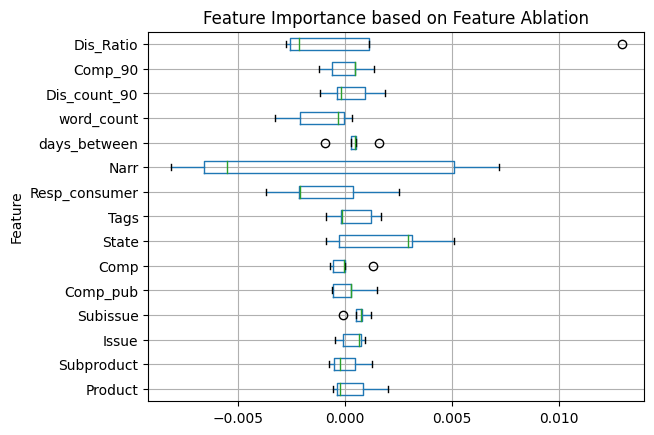

In [15]:
import matplotlib.pyplot as plt

# Plotting
dfx.boxplot(column=[ 'Product', 'Subproduct', 'Issue', 'Subissue', 'Comp_pub',
       'Comp', 'State', 'Tags', 'Resp_consumer', 'Narr', 'days_between',
       'word_count', 'Dis_count_90', 'Comp_90', 'Dis_Ratio'], vert=False)
plt.title('Feature Importance based on Feature Ablation')
plt.ylabel('Feature')
plt.show()

## **Observation:**
Based on the box plot presented, it is evident that each feature contributes to the model's performance, with no single feature dominating in importance. Notably, the "narratives" feature exhibits a higher variance than the others. We believe this uniformity in feature importance can be attributed to our preprocessing step, wherein we employed the Synthetic Minority Over-sampling Technique (SMOTE) to address data imbalance. By doing so, SMOTE ensures that all features are rendered nearly equivalently important, thereby alleviating concerns regarding the initial imbalanced nature of our data set. This demonstrates the effectiveness of SMOTE in balancing data and ensuring that all features play an integral role in the modeling process.